# ai_dev_productivity #

<table>
  <th>Column</th>
  <th>Description</th>
 <tr>
   <td>housing_coding</td>
   <td>Total focused hours spent on software development work (0–12 hours).</td>
 </tr>
 <tr>
   <td>coffee_intake_mg</td>
   <td>Daily caffeine intake in milligrams (0–600 mg).</td>
 </tr>
 <tr>
   <td>distractions	</td>
   <td>Number of distractions (e.g., meetings, Slack notifications) (0–10).</td>
 </tr>
 <tr>
    <td>sleep_hours	</td>
    <td>Number of hours of sleep the previous night (3–10 hours).</td>
 </tr>
 <tr>
    <td>commits	</td>
    <td>Number of code commits pushed during the day (0–20).</td>
 </tr>
 <tr>
    <td>bugs_reported</td>
    <td>Number of bugs reported in code written that day (0–10).</td>
 </tr>
 <tr>
    <td>ai_usage_hours</td>
    <td>Number of hours spent using AI tools (e.g., ChatGPT, Copilot) (0–12).</td>
 </tr>
 <tr>
    <td>cognitive_load</td>
    <td>Self-reported mental strain on a scale of 1 to 10.</td>
 </tr>
 <tr>
   <td>task_success</td>
   <td>Target column — whether the daily productivity goal was achieved (0/1).</td>
 </tr>
</table>

 ### Assumptions
 + The dataset is from a specific company.



In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('ai_dev_productivity.csv')

In [6]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df["task_success"].unique()

array([1, 0], dtype=int64)

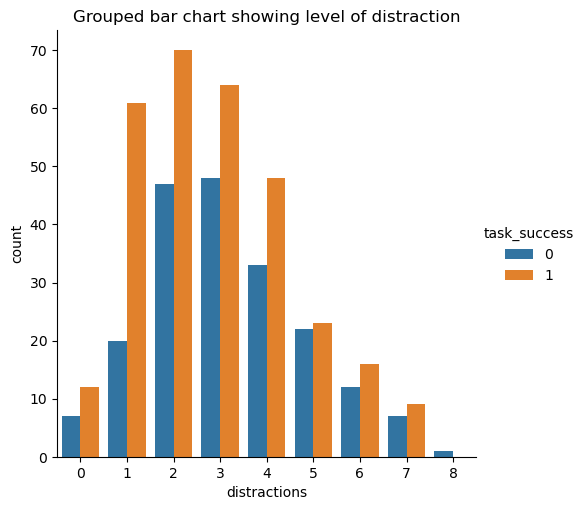

In [9]:
sns.catplot(data=df, x="distractions", hue="task_success", kind="count")
plt.title("Grouped bar chart showing level of distraction");

### Insights from the plot
+ The number of people with no distractions are very few, indicating that in an average workspace, it's hard not to find distractions.

+ 78.2% of developers experience at least 1-4 distractions a day.

+ Less than 4% of developers have 0 distractions a day.


In [11]:
distraction_count = df["distractions"].value_counts()

In [12]:
distraction_percent = distraction_count / 500 * 100
print(distraction_percent)

distractions
2    23.4
3    22.4
1    16.2
4    16.2
5     9.0
6     5.6
0     3.8
7     3.2
8     0.2
Name: count, dtype: float64


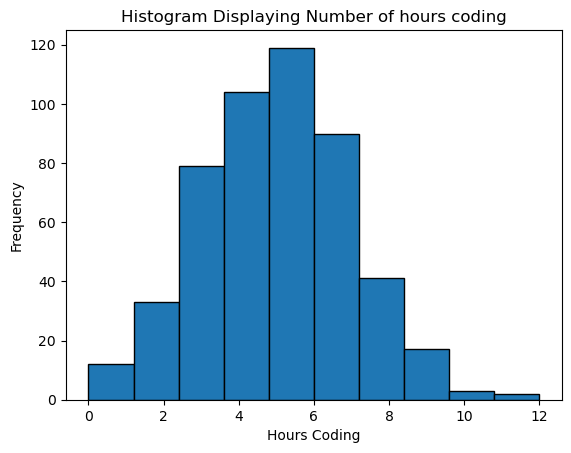

In [13]:
plt.hist(df["hours_coding"], edgecolor = "black")
plt.xlabel("Hours Coding")
plt.ylabel("Frequency")
plt.title("Histogram Displaying Number of hours coding");

In [14]:
df["hours_coding"].mean()

5.0156

#####  Insight from the  Histogram Displaying Number of hours coding

+ Developers spend an average of 5 hours coding each day.


In [16]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [17]:
zero_hours_coding = df[df["hours_coding"] == 0]
print("Number of zero hours coding entries:", len(zero_hours_coding))

Number of zero hours coding entries: 2


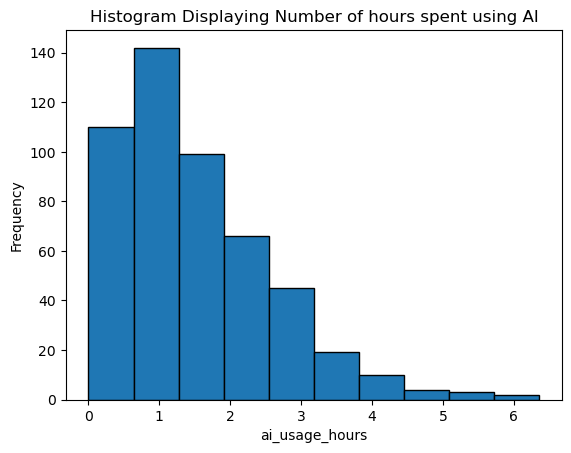

In [18]:
plt.hist(df["ai_usage_hours"], edgecolor = "black")
plt.xlabel("ai_usage_hours")
plt.ylabel("Frequency")
plt.title("Histogram Displaying Number of hours spent using AI");

In [19]:
df["ai_usage_hours"].mean()

1.51092

#####  Histogram Displaying Number of hours spent using AI

+ Developers spend an average of one and a half hours using ai each day.

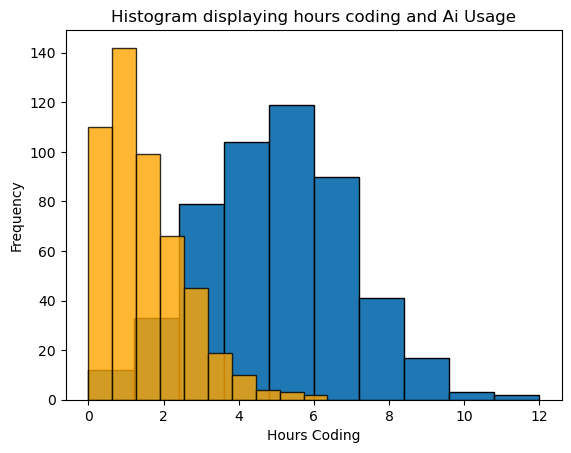

In [21]:
plt.hist(df["hours_coding"], bins=10, edgecolor="black" )
plt.hist(df["ai_usage_hours"], bins=10, color="orange", edgecolor="black", alpha=0.8)
plt.xlabel("Hours Coding")
plt.ylabel("Frequency")
plt.title("Histogram displaying hours coding and Ai Usage");

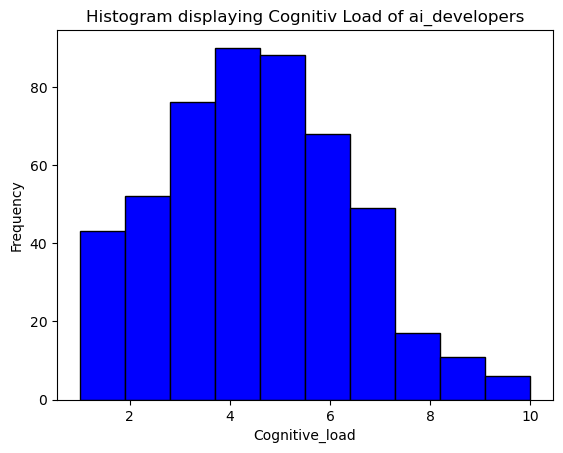

In [23]:
plt.hist(df["cognitive_load"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Cognitive_load")
plt.ylabel("Frequency")
plt.title("Histogram displaying Cognitiv Load of ai_developers");

In [24]:
# Rounding up "cognitive_load" column
df["cognitive_load"] = df["cognitive_load"].round()# Rounding up "cognitive_load" column
df["cognitive_load"] = df["cognitive_load"].round()

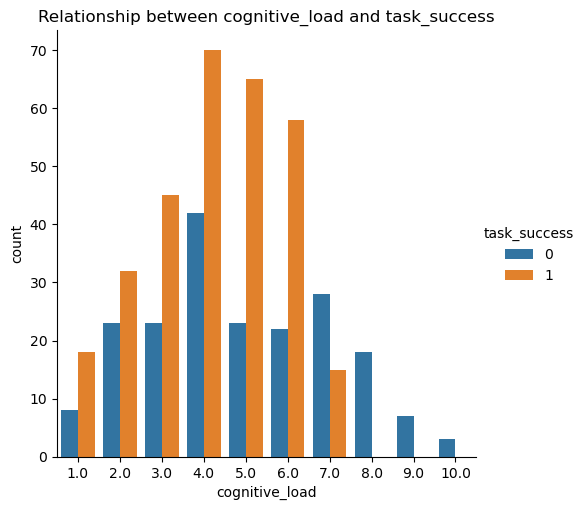

In [25]:
sns.catplot(data=df, x="cognitive_load", hue="task_success", kind="count")
plt.title("Relationship between cognitive_load and task_success");

In [26]:
cognitive_load_count = df["cognitive_load"].value_counts()
cognitive_load_count

cognitive_load
4.0     112
5.0      88
6.0      80
3.0      68
2.0      55
7.0      43
1.0      26
8.0      18
9.0       7
10.0      3
Name: count, dtype: int64

In [27]:
cognitive_load_percent = cognitive_load_count / 500 * 100
print(cognitive_load_percent)

cognitive_load
4.0     22.4
5.0     17.6
6.0     16.0
3.0     13.6
2.0     11.0
7.0      8.6
1.0      5.2
8.0      3.6
9.0      1.4
10.0     0.6
Name: count, dtype: float64


##### Insight from the Relationship between cognitive_load and task_success visualization

+ 28% of people who have cognitive load between 80% - 100% do not have a task success rate.



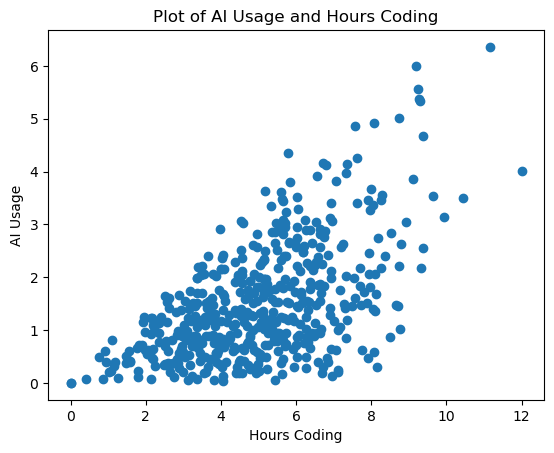

In [29]:
plt.scatter(x=df["hours_coding"], y=df["ai_usage_hours"])
plt.xlabel("Hours Coding")
plt.ylabel("AI Usage")
plt.title("Plot of AI Usage and Hours Coding");

In [30]:
# Rounding up "cognitive_load" column
df["sleep_hours"] = df["sleep_hours"].round()

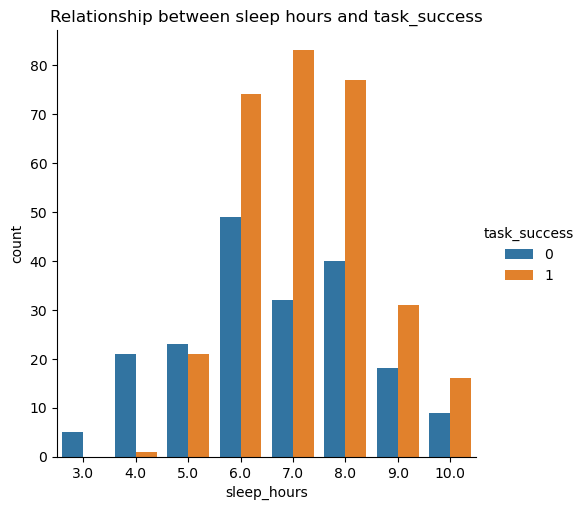

In [31]:
sns.catplot(data=df, x="sleep_hours", hue="task_success", kind="count")
plt.title("Relationship between sleep hours and task_success");

In [32]:
sleep_count = df["sleep_hours"].value_counts()
sleep_count

sleep_hours
6.0     123
8.0     117
7.0     115
9.0      49
5.0      44
10.0     25
4.0      22
3.0       5
Name: count, dtype: int64

In [33]:
sleep_percent = sleep_count / 500 * 100
print(sleep_percent)

sleep_hours
6.0     24.6
8.0     23.4
7.0     23.0
9.0      9.8
5.0      8.8
10.0     5.0
4.0      4.4
3.0      1.0
Name: count, dtype: float64


#### Insight showing the Relationship between sleep hours and task_success

+ 